### Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Load Dataset

In [28]:
customer_df = pd.read_csv('customer.csv')

In [29]:
credit_card_df = pd.read_csv('credit_card.csv')

In [31]:
# Merge the datasets (assuming 'Client_Num' is the common column)
df = pd.merge(customer_df, credit_card_df, on='Client_Num', how='inner')

### 1. What factors most influence customer satisfaction?

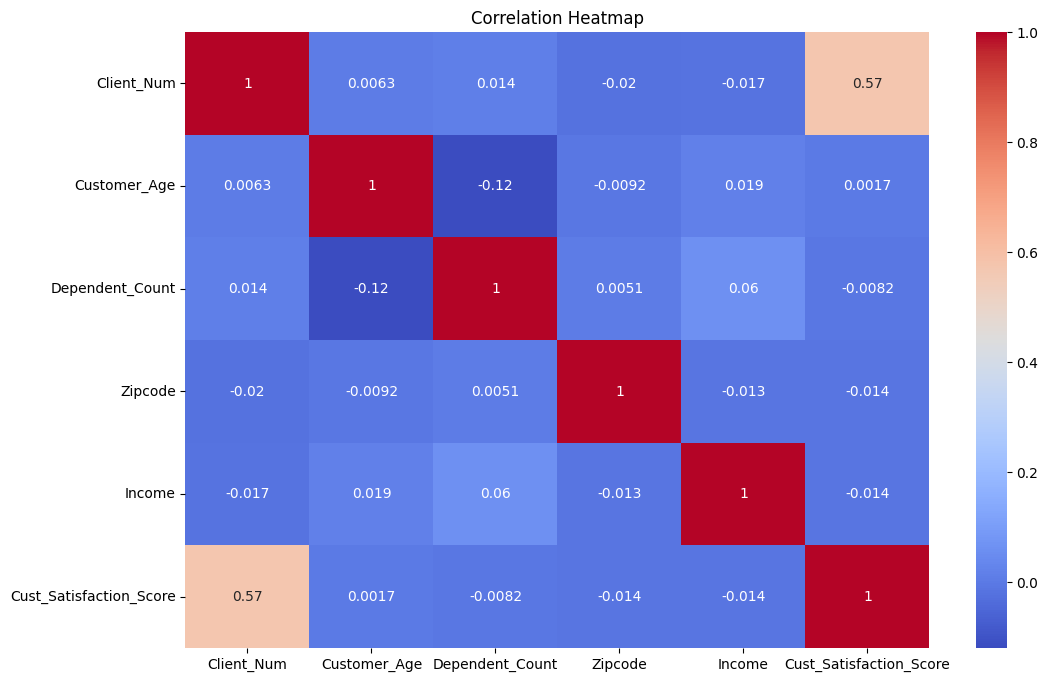

In [12]:
# 1. Correlation heatmap for customer satisfaction
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

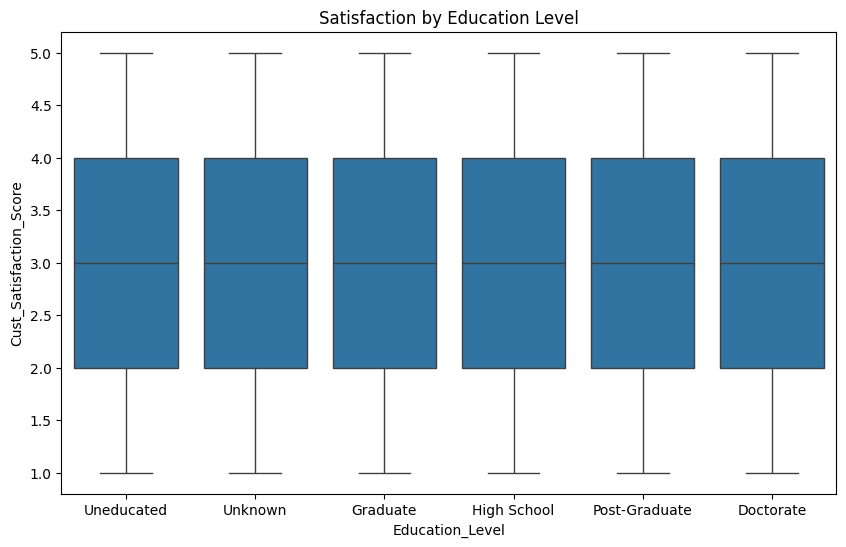

In [8]:
# 1. Boxplot of satisfaction by education
plt.figure(figsize=(10,6))
sns.boxplot(x='Education_Level', y='Cust_Satisfaction_Score', data=df)
plt.title('Satisfaction by Education Level')
plt.show()

### 2. How does credit card usage differ by customer demographics (age, gender, education, state)?

C:\Users\Admin\AppData\Local\Temp\ipykernel_10272\1893448160.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Total_Trans_Amt', data=df, ci=None)


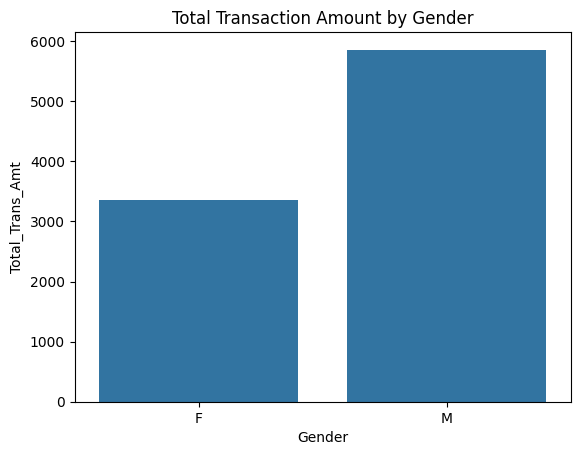

In [32]:
# 2. Grouped bar: Credit card usage by gender
sns.barplot(x='Gender', y='Total_Trans_Amt', data=df, ci=None)
plt.title('Total Transaction Amount by Gender')
plt.show()

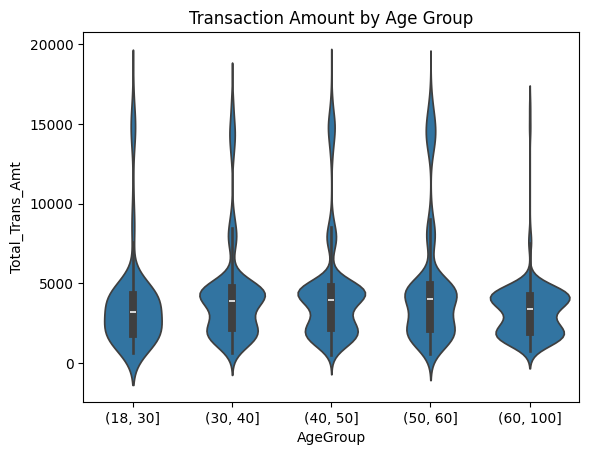

In [34]:
# 2. Violin plot: Usage by age group
df['AgeGroup'] = pd.cut(df['Customer_Age'], bins=[18,30,40,50,60,100])
sns.violinplot(x='AgeGroup', y='Total_Trans_Amt', data=df)
plt.title('Transaction Amount by Age Group')
plt.show()

### 3. What is the relationship between credit limit and delinquency?

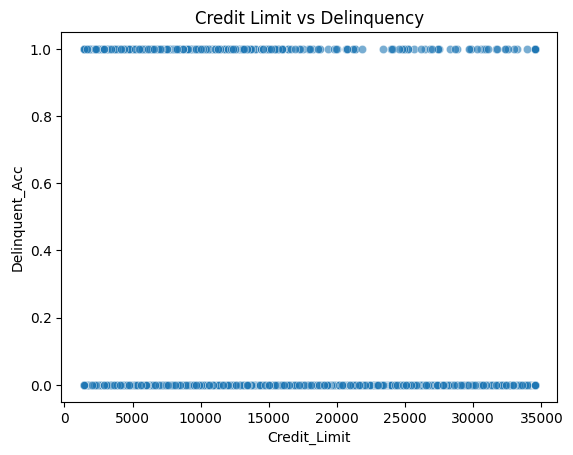

In [35]:
# 3. Scatter: Credit limit vs delinquency
sns.scatterplot(x='Credit_Limit', y='Delinquent_Acc', data=df, alpha=0.6)
plt.title('Credit Limit vs Delinquency')
plt.show()

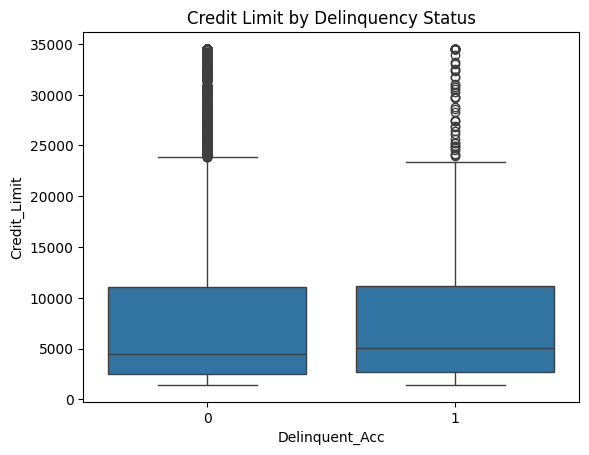

In [36]:
# 3. Boxplot: Credit limit by delinquency
sns.boxplot(x='Delinquent_Acc', y='Credit_Limit', data=df)
plt.title('Credit Limit by Delinquency Status')
plt.show()


### 4. Which states have the highest and lowest average transaction amounts?

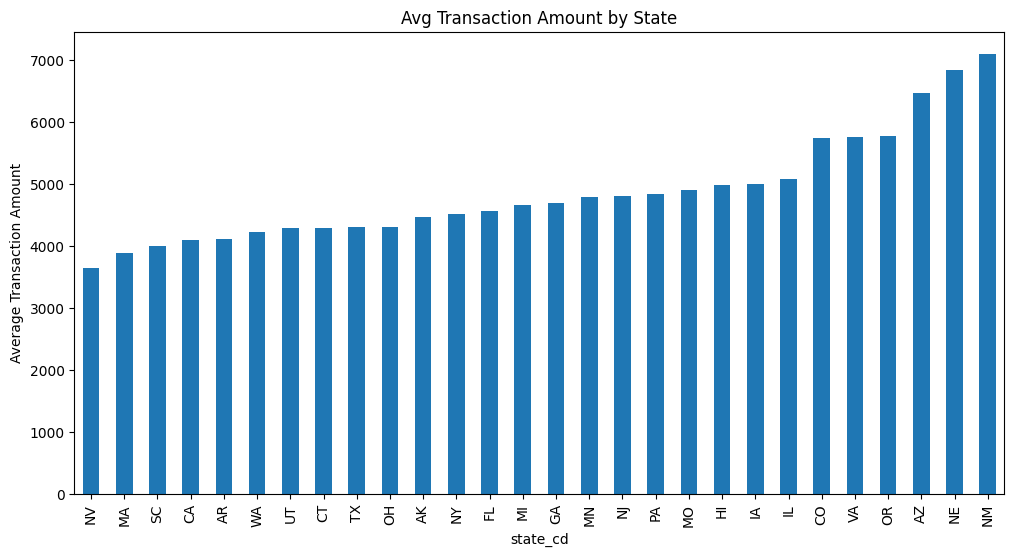

In [37]:
# 4. Bar: Average transaction by state
state_avg = df.groupby('state_cd')['Total_Trans_Amt'].mean().sort_values()
state_avg.plot(kind='bar', figsize=(12,6), title='Avg Transaction Amount by State')
plt.ylabel('Average Transaction Amount')
plt.show()

### 5. How does the average utilization ratio vary across different job types or education levels?

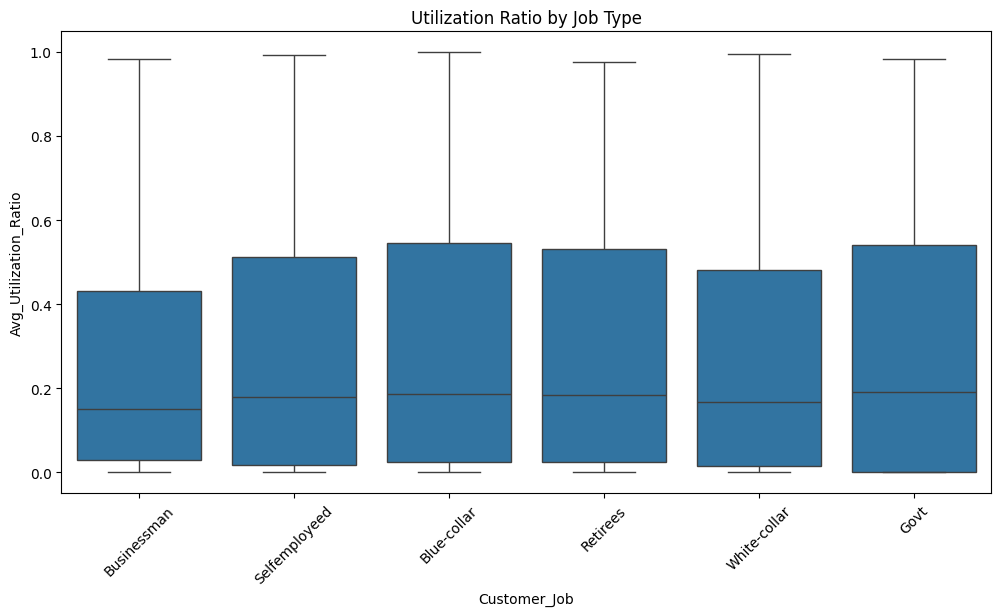

In [38]:
# 5. Boxplot: Utilization ratio by job type
plt.figure(figsize=(12,6))
sns.boxplot(x='Customer_Job', y='Avg_Utilization_Ratio', data=df)
plt.title('Utilization Ratio by Job Type')
plt.xticks(rotation=45)
plt.show()

### 6. What is the trend of activation rates over time (weeks/quarters)?

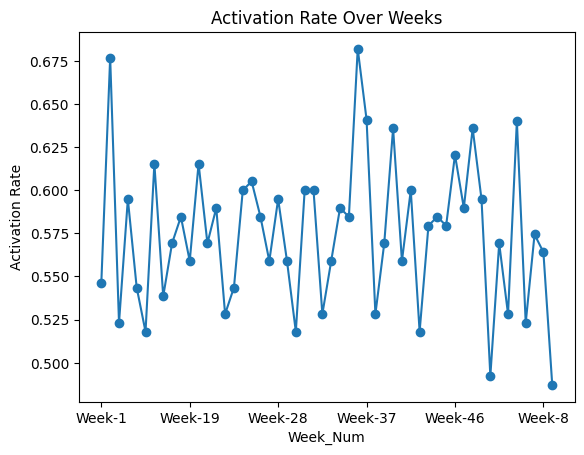

In [39]:
# 6. Line: Activation rate over weeks
activation_rate = df.groupby('Week_Num')['Activation_30_Days'].mean()
activation_rate.plot(kind='line', marker='o', title='Activation Rate Over Weeks')
plt.ylabel('Activation Rate')
plt.show()

### 7. Are there patterns in expense types (e.g., travel, bills, grocery) by customer segment?

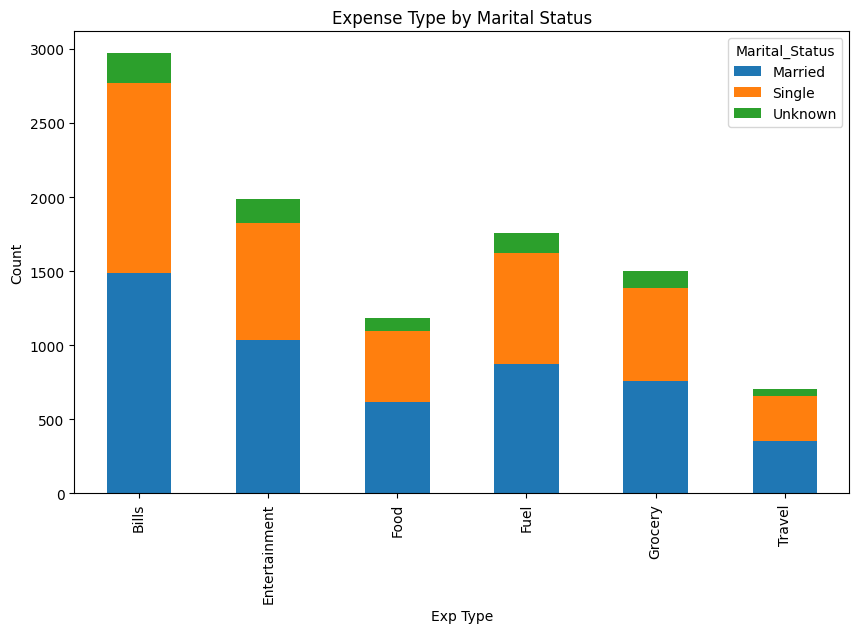

In [40]:
# 7. Stacked bar: Expense type by marital status
exp_type = pd.crosstab(df['Exp Type'], df['Marital_Status'])
exp_type.plot(kind='bar', stacked=True, figsize=(10,6), title='Expense Type by Marital Status')
plt.ylabel('Count')
plt.show()


### 8. How does income relate to total transaction amount and satisfaction?

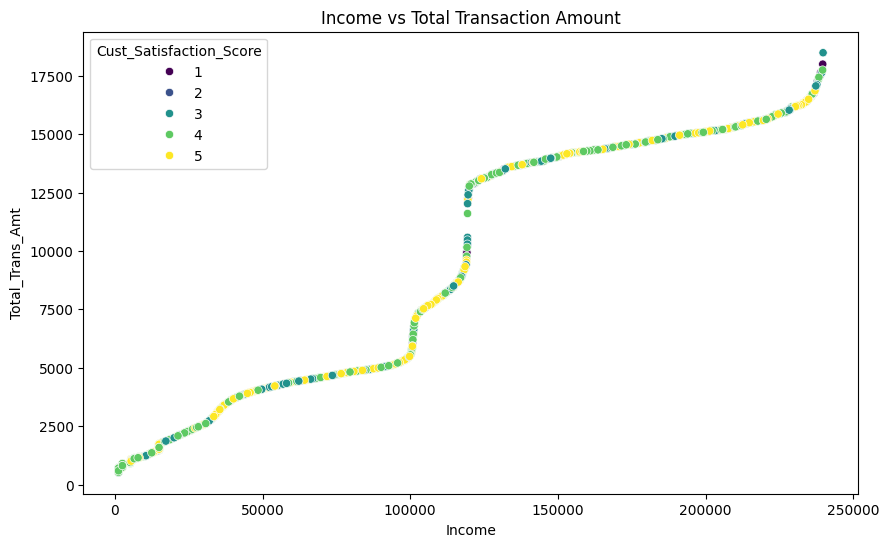

In [41]:
# 8. Scatter: Income vs Total Transaction Amount colored by satisfaction
plt.figure(figsize=(10,6))
sns.scatterplot(x='Income', y='Total_Trans_Amt', hue='Cust_Satisfaction_Score', data=df, palette='viridis')
plt.title('Income vs Total Transaction Amount')
plt.show()

### 9. What is the distribution of personal loan acceptance across different customer profiles?

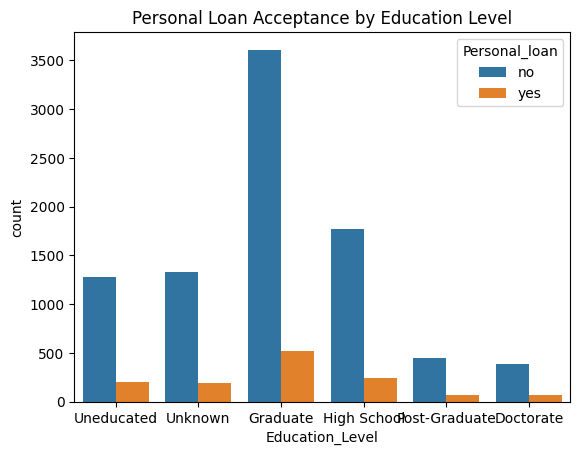

In [42]:
# 9. Bar: Personal loan acceptance by education
sns.countplot(x='Education_Level', hue='Personal_loan', data=df)
plt.title('Personal Loan Acceptance by Education Level')
plt.show()

### 10. Which features are most predictive of a customer becoming delinquent?

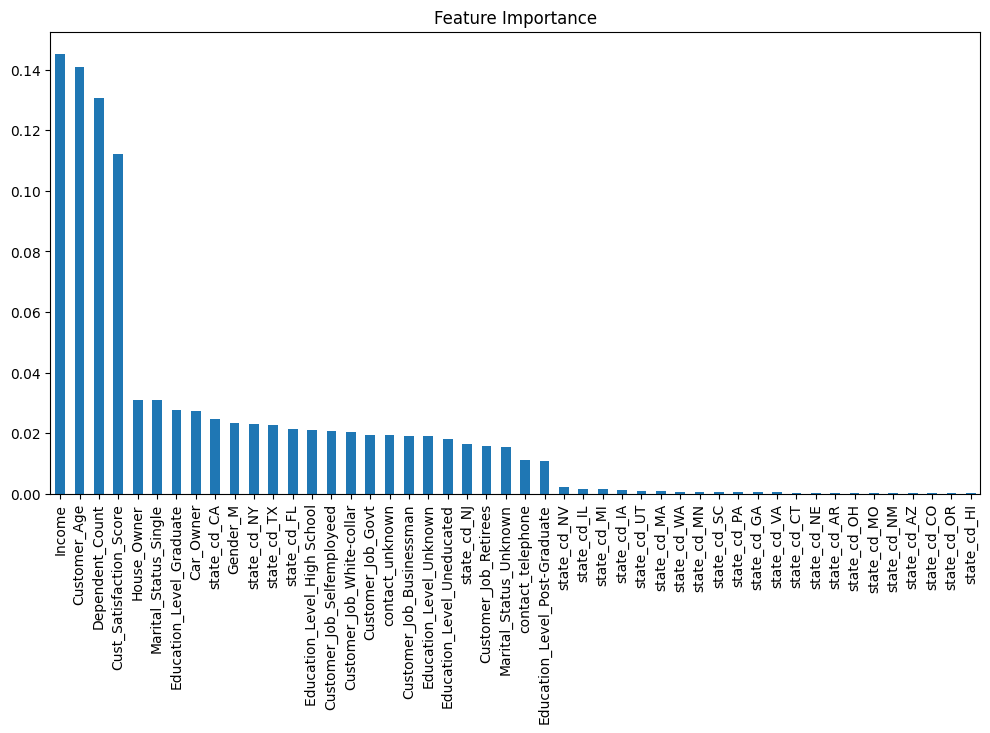

In [46]:
import joblib
import bz2

# 10. Feature importance (if you have a trained model)
# Load the scaler and model
scaler = joblib.load('scaler.joblib')
with bz2.BZ2File('compressed_loan_model.pbz2', 'rb') as f:
    model = joblib.load(f)

importances = model.feature_importances_
feat_names = model.feature_names_in_
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(12,6), title='Feature Importance')
plt.show()